In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.


Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at $121.61 billion in 2019 and is projected to reach $1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.


With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

#Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.



#Data Dictionary:

visitors: Average number of visitors, in millions, to the platform in the past week

ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)

major_sports_event: Any major sports event on the day

genre: Genre of the content

dayofweek: Day of the release of the content

season: Season of the release of the content

views_trailer: Number of views, in millions, of the content trailer


views_content: Number of first-day views, in millions, of the conten

The following questions need to be answered as a part of the EDA section of the project:

What does the distribution of content views look like?

What does the distribution of genres look like?

The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

How does the viewership vary with the season of release?

What is the correlation between trailer views and content views?

#Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Loading the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/projects/predictive modelling project/ottdata.csv')

#Data overview

In [4]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [5]:
#checking the shape of datase
df.shape


(1000, 8)

In [6]:
df

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46
...,...,...,...,...,...,...,...,...
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47


there are 1000 rows and 8 columns

In [7]:
#checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


There are total 8 columns in which 3 are categorical that is object and the remaining 5 are numerical

In [8]:
#statestical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


Average number of views content on the first day is 0.47 million

In [9]:
# creating a copy of the data so that original data remains unchanged
data = df.copy()

In [10]:
#checking missing values
Missing_values = data.isnull().sum()
print('The missing values is ',Missing_values)

The missing values is  visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


#Exploratory Data Analysis

#Univariate Analysis

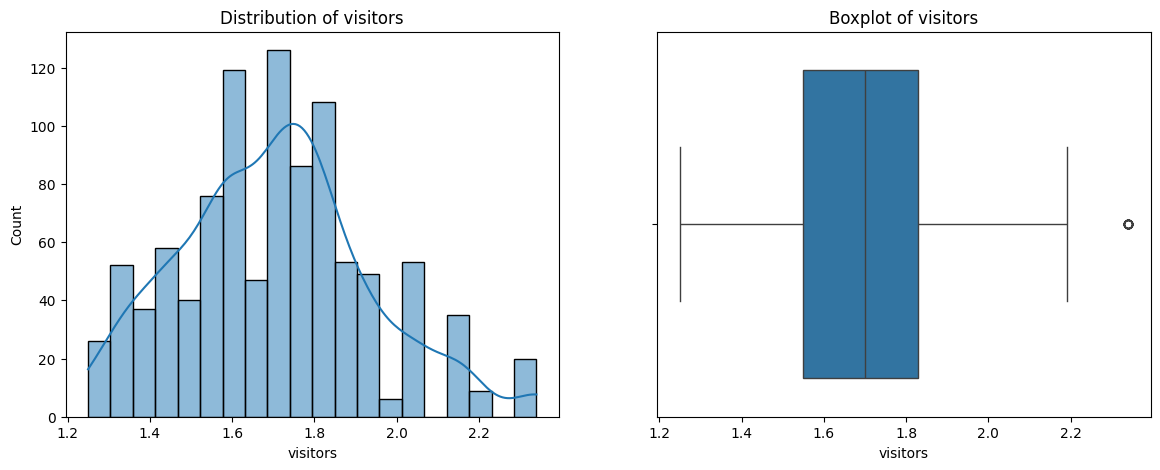

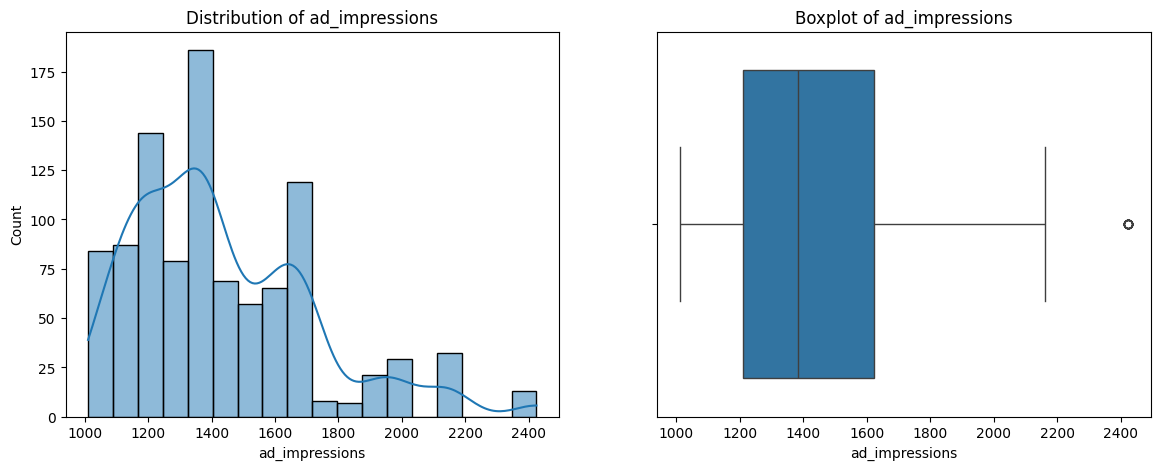

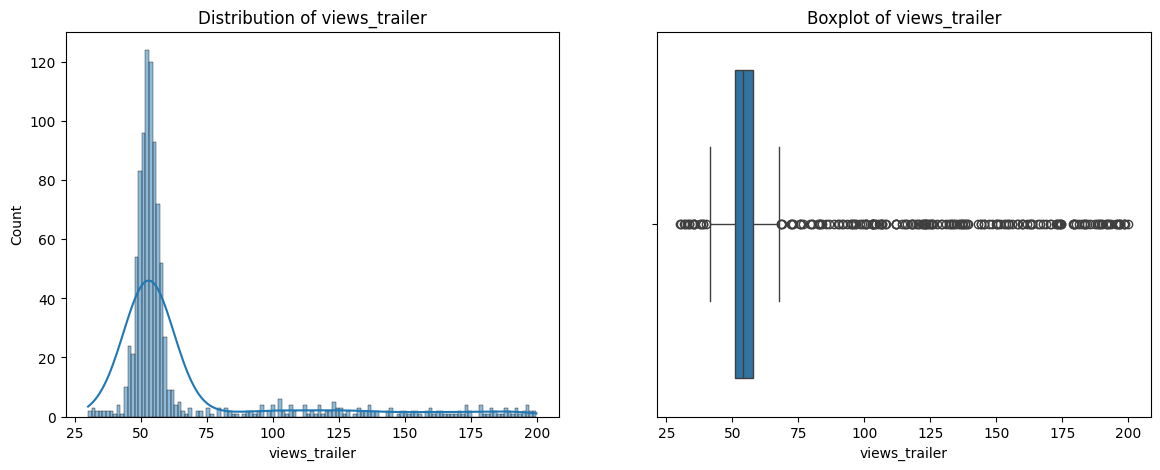

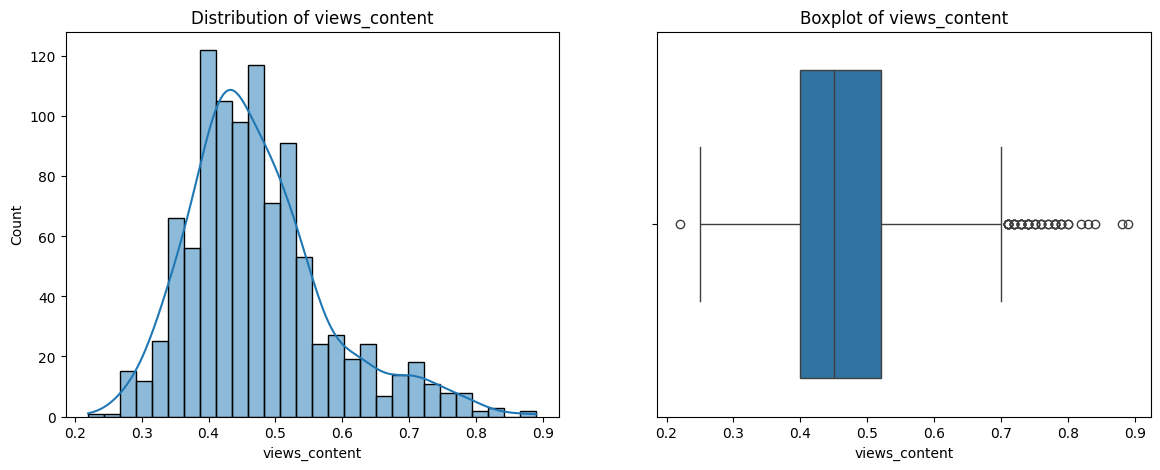

In [11]:
# Plotting histograms and box plots for numerical variables

num_vars = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']
for var in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[var], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {var}')
    sns.boxplot(x=df[var], ax=axes[1])
    axes[1].set_title(f'Boxplot of {var}')
    plt.show()




*   visitors, views_content and views tailor are showing kind of normal distribution
*   there are many outliers in views content and views tailor


*   The views_content and views tailor data is right skewed Right-skewed with many outliers. This means that most content receives fewer views, but there are a few that get significantly higher views. This is common in streaming services where a few hit shows/movies drive most of the traffic.










In [12]:
df['major_sports_event'] = df['major_sports_event'].apply(lambda x: 'True' if x == 1 else 'False')

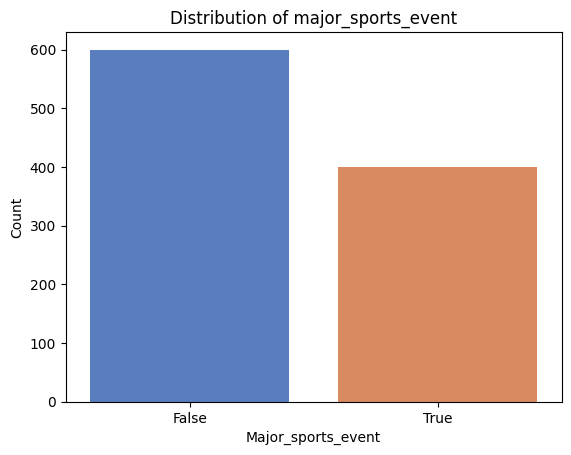

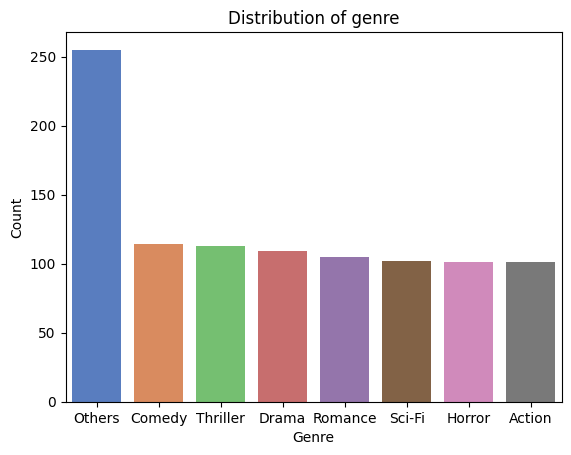

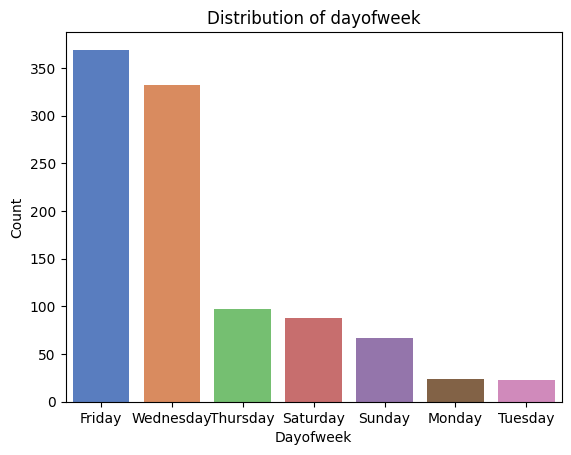

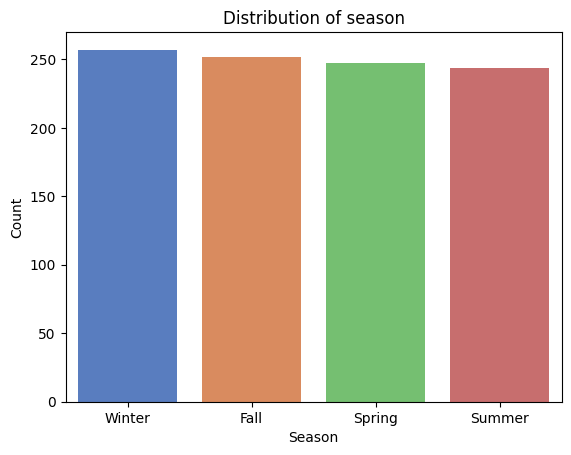

In [13]:
# Plotting bar charts for categorical variables
cat_vars = ['major_sports_event', 'genre', 'dayofweek', 'season']
for var in cat_vars:
    sns.countplot(x=df[var], order=df[var].value_counts().index,palette = 'muted')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.show()



*   The count of all the genere is almost same except for the others
*   Even distribution across seasons.
 This indicates no particular season is favored for releasing content, suggesting a strategy to keep viewership engaged year-round.


*   The content is releasd mostly on friday and wednesday and released least on mondays and tuesdays






#Bivariate Analysis

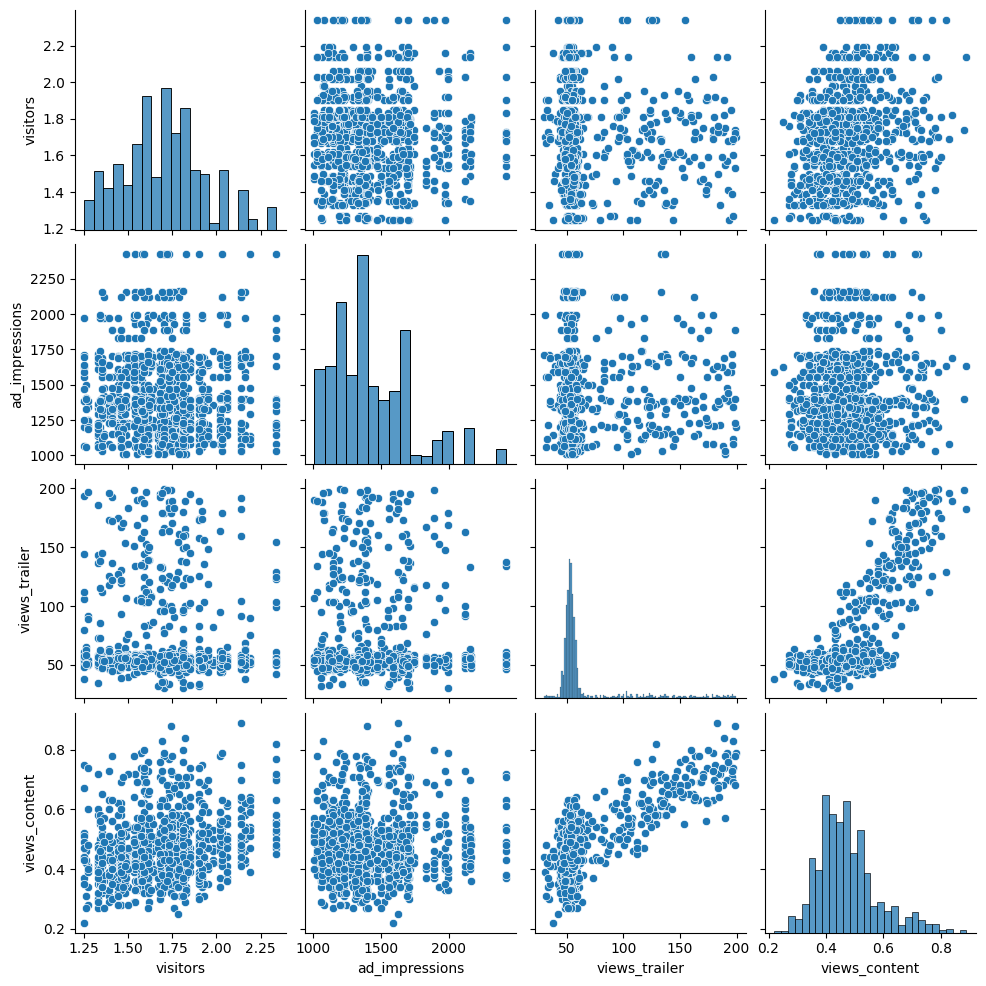

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['visitors', 'ad_impressions', 'views_trailer', 'views_content']
sns.pairplot(data=df[num_vars])
plt.show()




*   The most view content is sci-fi and action
*   If the content is rleased on wednesday the views can go up to more than 5.5 million


*   Highest views are when the content is released in winter season


*   Views trailer and views content have a very  strong positive relation
*   There is no clear or significant linear relationship between ad_impressions and views_content.






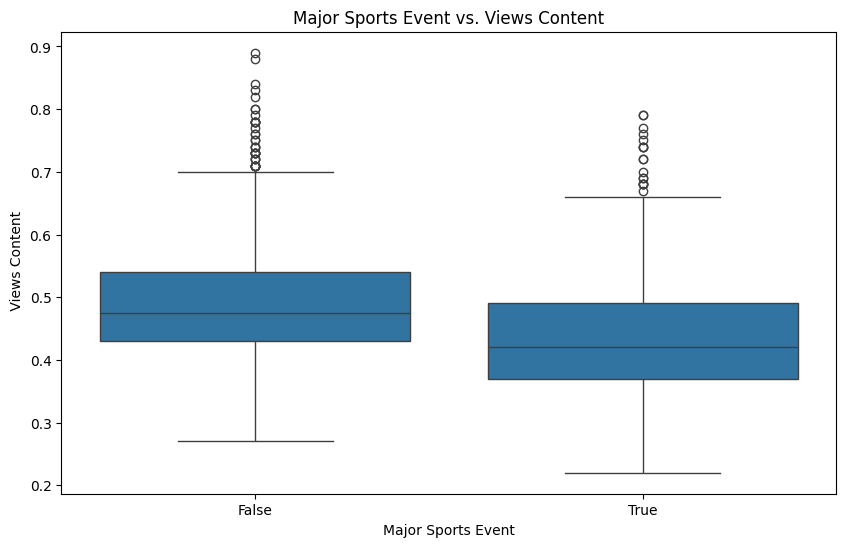

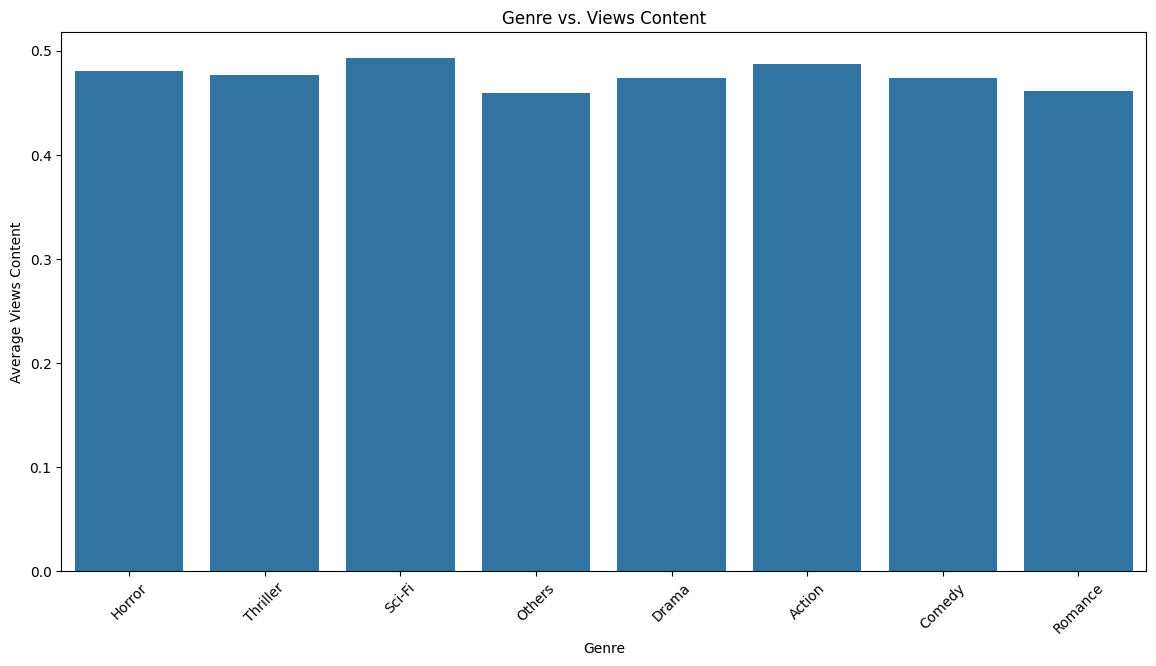

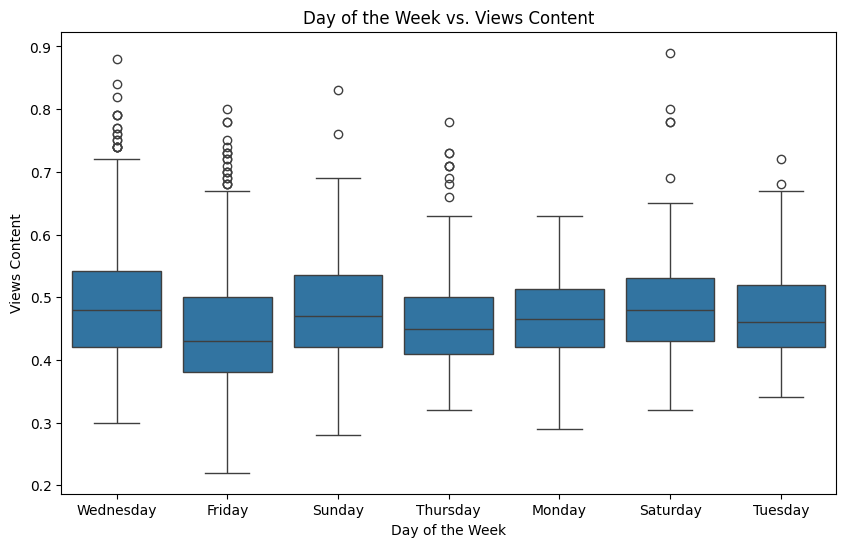

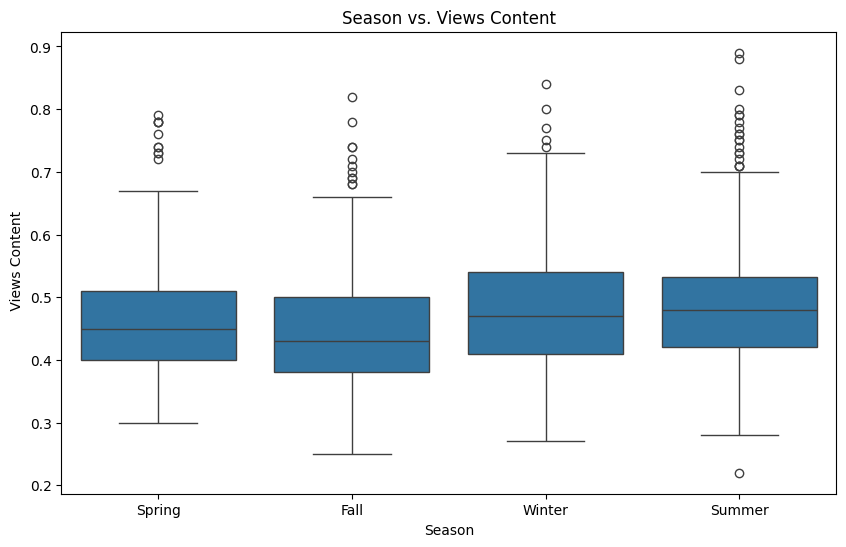

In [15]:
# Major Sports Event vs. Log Views Content
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='major_sports_event', y='views_content')
plt.title('Major Sports Event vs. Views Content')
plt.xlabel('Major Sports Event')
plt.ylabel(' Views Content')
plt.show()

# Genre vs. Log Views Content
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='genre', y='views_content', estimator=np.mean, ci=None)
plt.title('Genre vs. Views Content')
plt.xlabel('Genre')
plt.ylabel('Average Views Content')
plt.xticks(rotation=45)
plt.show()

# Day of the Week vs. Log Views Content
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dayofweek', y='views_content')
plt.title('Day of the Week vs. Views Content')
plt.xlabel('Day of the Week')
plt.ylabel('Views Content')
plt.show()

# Season vs. Log Views Content
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='views_content')
plt.title('Season vs. Views Content')
plt.xlabel('Season')
plt.ylabel(' Views Content')
plt.show()

Different genres attract varying levels of viewership. While most genres show a similar level of first-day views, particular genres such as Sci-Fi and Action tend to have higher median views. This indicates that they are generally more popular. In contrast, Thriller has a slightly lower median viewership. The spread of views within each genre is quite wide, with numerous outliers, representing spikes in popularity for certain pieces of content even within less popular genres

Genres: Sci-Fi and Action genres tend to have higher viewership, while Thriller has a lower median but consistent outliers.

Days of the Week: Content released on Wednesdays and Fridays tends to perform better, while Mondays and Saturdays see lower views.

Seasons: Content released in Winter and Summer tends to be viewed more, possibly due to seasonal behaviors, while Spring and Fall show more stable but lower engagement.

In [16]:
plt.figure(figsize=(12, 10))

# Plot the heatmap with enhanced settings
sns.heatmap(
    data[num_cols].corr(),
    annot=True,
    vmin=-1, vmax=1,
    fmt=".2f",
    cmap="RdYlBu",
    annot_kws={"size": 12},
    linewidths=0.8,
    square=True,
    cbar_kws={"shrink": 0.8},
)

# Ensure the layout is tight so nothing gets cut off
plt.tight_layout()
plt.show()

NameError: name 'num_cols' is not defined

<Figure size 1200x1000 with 0 Axes>

##Answers to key Questions

##What does the distribution of content views look like?

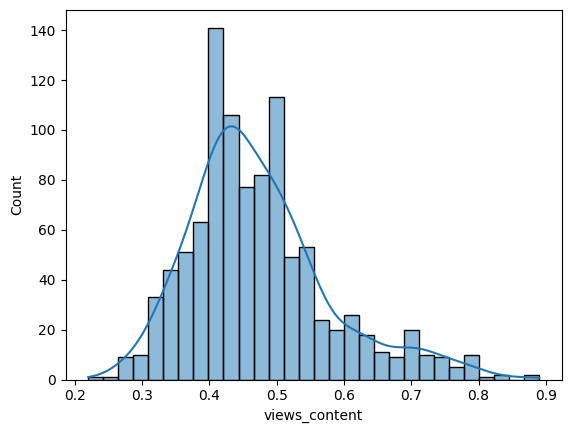

In [17]:
figsize = (20,30)
sns.histplot(data = data , x = 'views_content',kde=True,bins=30 )

plt.show()

It is normally distributed

The views_content  data is right skewed Right-skewed with many outliers. This means that most content receives fewer views, but there are a few that get significantly higher views. This is common in streaming services where a few hit shows/movies drive most of the traffic

Most content receives fewer views, clustered around the lower end of the viewership range.
There are a few content pieces that receive significantly higher views, which extend the tail of the distribution to the right.

the highest count is 130 which is of 0.4million views

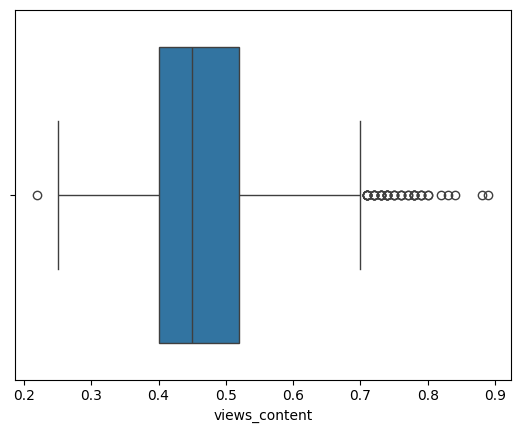

In [18]:
sns.boxplot(data=df, x='views_content')
axes[1].set_title('Boxplot of First-Day Content Views')
axes[1].set_ylabel('First-Day Views (in millions)')
plt.show()

The outliers in the boxplot highlight that some content significantly outperforms the norm. These are likely:
Blockbuster movies
New seasons of popular shows
Highly promoted or well-received original content

##What does the distribution of genres look like?

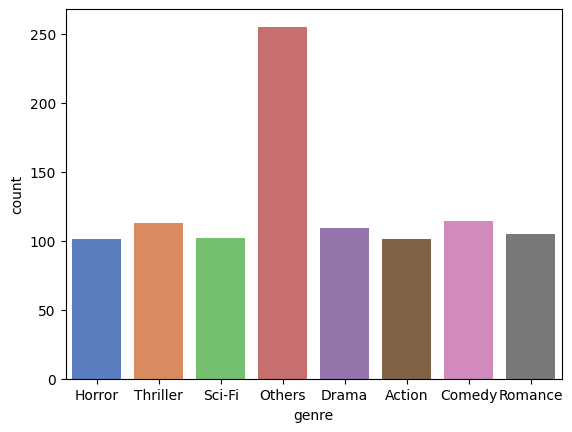

In [19]:
sns.countplot(data = data , x = 'genre',palette = 'muted')

plt.show()

The analysis of the distribution of genres on the ShowTime platform revealed some interesting trends. The 'Others' category stands out as the most watched genre, potentially indicating a collection of niche or mixed-genre content that appeals to a broad audience. Beyond this, Comedy and Thriller genres are equally popular, suggesting that the audience enjoys a mix of laughter and suspense in their viewing experience. Based on these insights, content strategy can be tailored to focus on producing or acquiring more content in these popular genres, ensuring broader audience engagement and satisfaction.

##The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?



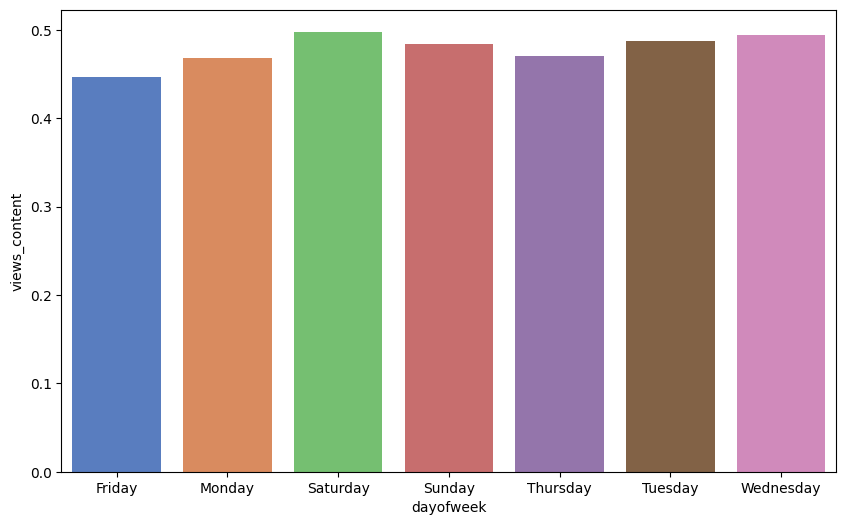

In [20]:
avg_views_by_day = data.groupby('dayofweek')['views_content'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_views_by_day, x='dayofweek', y='views_content', palette='muted')
plt.show()

Saturday stands out as the day with the highest viewership. This can be attributed to more viewers being available to consume content during their weekend leisure time.
Following Saturday, Wednesday, Tuesday, and Sunday also show higher viewership figures, which suggest that these mid-week and weekend days are popular for content consumption. This may be due to a mix of mid-week breaks and end-of-week relaxation periods.
On the other hand, Friday sees the lowest viewership. This could be because viewers might be occupied with social events or other activities as they kick off their weekends.

In summary, while the viewership does not vary significantly across the different days of the week, Saturday emerges as the day with the highest engagement. This insight can help ShowTime better schedule their content releases to maximize viewership.

##How does the viewership vary with the season of release?



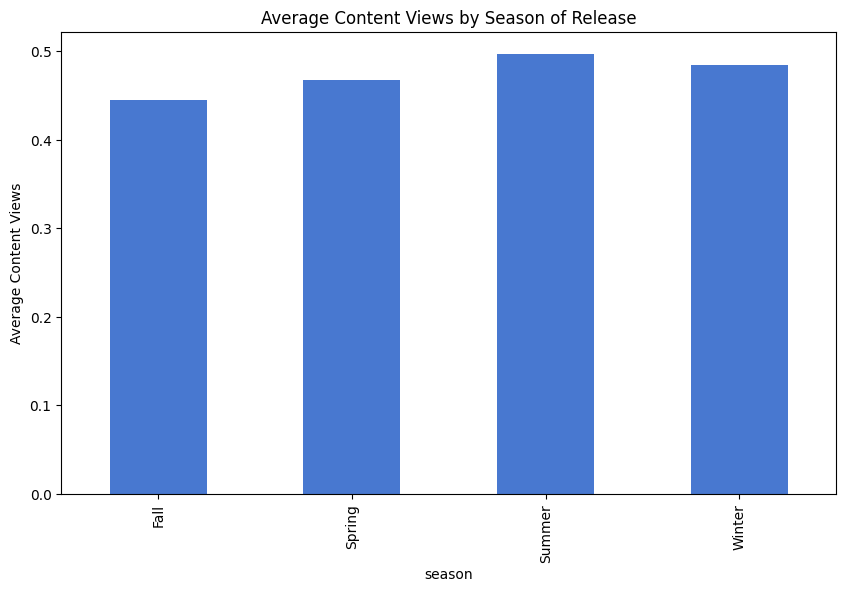

In [21]:
#groupby data
sns.set_palette('muted')
views_by_season = data.groupby('season')['views_content'].mean()
#plotting visualisation
views_by_season.plot(kind='bar', figsize=(10,6))
plt.title('Average Content Views by Season of Release')
plt.ylabel('Average Content Views')
plt.show()

Summer emerges as the season with the highest viewership, averaging 4.8 million views. This spike in viewership can be attributed to factors such as increased leisure time during vacations, leading to higher content consumption.
Winter follows with substantial viewership, indicating that audience engagement remains high as people likely spend more time indoors consuming content.
Spring also shows considerable viewer activity, although slightly less than winter.

The season with the least viewership is Fall, averaging 4.5 million views. This lower viewership might be influenced by various factors, including back-to-school schedules and the resumption of regular activities post-summer.

In summary, seasonality plays a role in viewership patterns, with summer showing the highest engagement. ShowTime can leverage these insights to plan content releases and marketing strategies to align with peak viewership seasons.



##What is the correlation between trailer views and content views?

In [22]:
corelation = data['views_trailer'].corr(data['views_content'])
print('corelation between trailer views and content views is', corelation)

corelation between trailer views and content views is 0.753962214820536


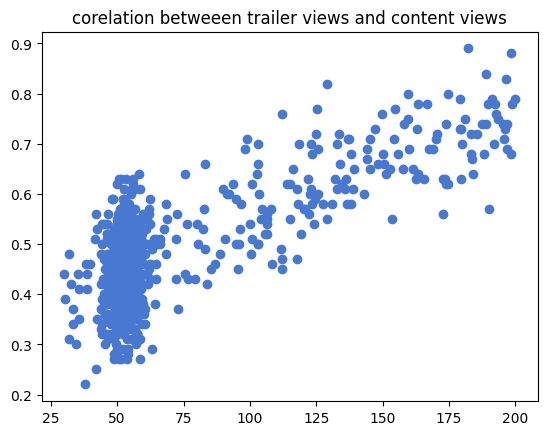

In [23]:
#plotting the corelation
plt.scatter(data['views_trailer'],data['views_content'])
plt.title('corelation betweeen trailer views and content views')
plt.show()




*  The correlation coefficient between trailer views and content views is 0.7. This indicates a strong positive correlation

* A correlation of 0.7 suggests that there is a significant positive relationship between the number of trailer views and the number of first-day content views. This means that content that receives a higher number of trailer views is likely to also receive a higher number of first-day views.
*  A scatter plot of trailer views against content views visually supports this finding, showing an upward trend where higher trailer views generally correspond to higher content views






#Data processing

In [24]:
#duplicate value check
duplicate = data.duplicated().sum()
print('The duplicate value is', duplicate)

The duplicate value is 0


There is no missing values

##Outlier Treatment

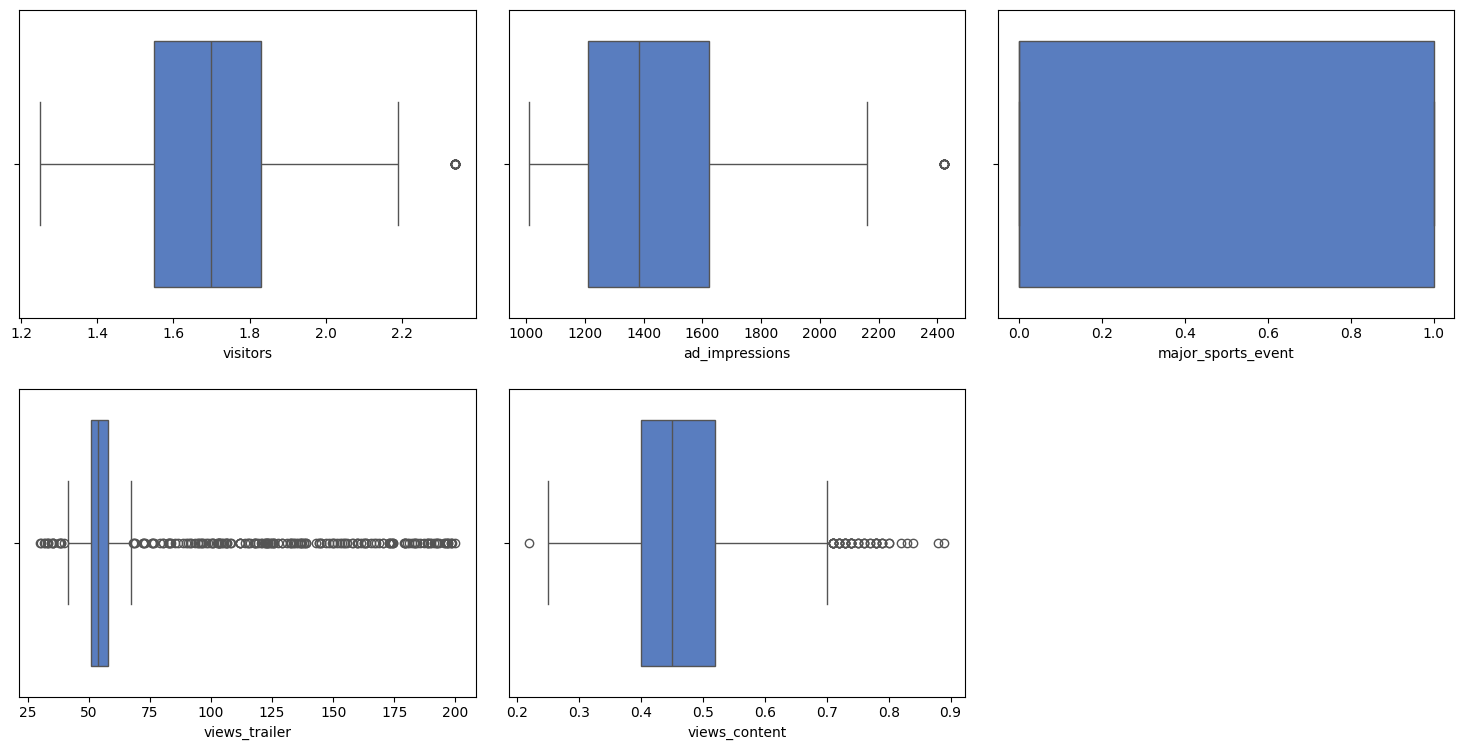

In [25]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()




*   There are outliers in trailer views lets treat them




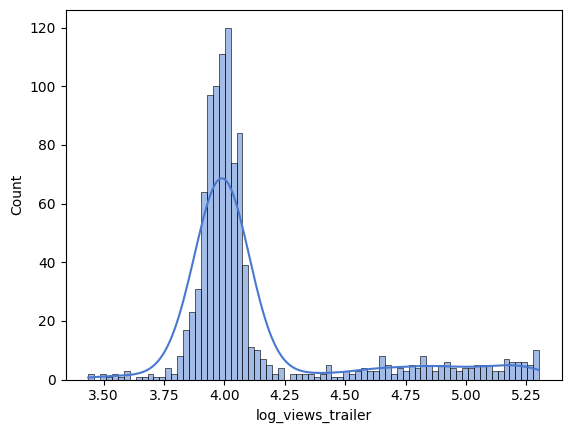

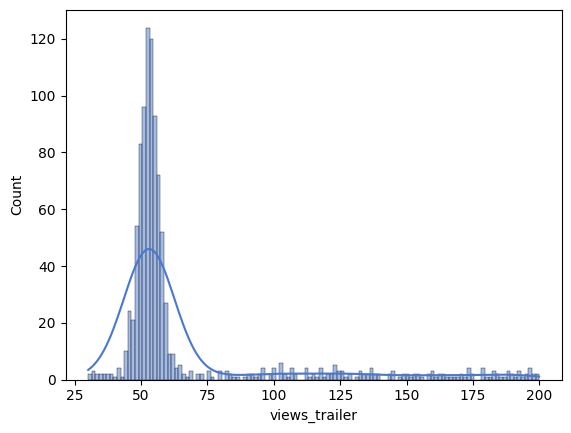

In [26]:
data['log_views_trailer']=np.log1p(data['views_trailer'])
figsize=(14,5)
sns.histplot(data=data,x='log_views_trailer',kde=True)
plt.show()
figsize=(14,5)
sns.histplot(data=data,x='views_trailer',kde=True)
plt.show()

After log transformation there is no significance change on the normality of the views_trailer column.

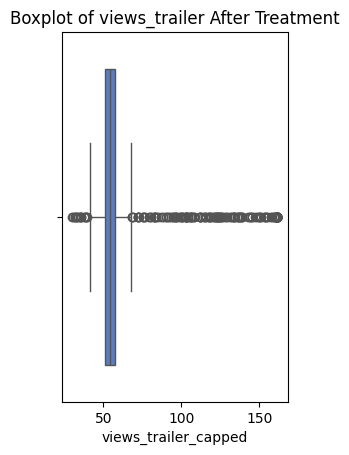

Summary Statistics Before Treatment:
count    1000.00000
mean       66.91559
std        35.00108
min        30.08000
25%        50.94750
50%        53.96000
75%        57.75500
max       199.92000
Name: views_trailer, dtype: float64

Summary Statistics After Treatment:
count    1000.00000
mean       65.87064
std        31.58649
min        30.08000
25%        50.94750
50%        53.96000
75%        57.75500
max       161.61800
Name: views_trailer_capped, dtype: float64


In [27]:

sns.boxplot(x='views_trailer', data=data)
plt.title('Boxplot of views_trailer Before Treatment')

# Outlier Capping (95th percentile)
data['views_trailer_capped'] = np.where(data['views_trailer'] > data['views_trailer'].quantile(0.95),
                                        data['views_trailer'].quantile(0.95),
                                        data['views_trailer'])


plt.subplot(1, 2, 2)
sns.boxplot(x='views_trailer_capped', data=data)
plt.title('Boxplot of views_trailer After Treatment')

plt.show()

print("Summary Statistics Before Treatment:")
print(data['views_trailer'].describe())

print("\nSummary Statistics After Treatment:")
print(data['views_trailer_capped'].describe())

views_trailer columns has outliers in it which signifies that the number of views of the trailer each value for this field is important to predict the final output so we can need to kept those data.

###Data Preparation for modeling

###Convert Categorical Variables to Dummy Variables

In [28]:
# Convert Categorical Variables to Dummy Variables
data = pd.get_dummies(data, columns=['genre', 'dayofweek', 'season'], drop_first=True)

# Verify the cleaned data
print(data.head())

   visitors  ad_impressions  major_sports_event  views_trailer  views_content  \
0      1.67         1113.81                   0          56.70           0.51   
1      1.46         1498.41                   1          52.69           0.32   
2      1.47         1079.19                   1          48.74           0.39   
3      1.85         1342.77                   1          49.81           0.44   
4      1.46         1498.41                   0          55.83           0.46   

   log_views_trailer  views_trailer_capped  genre_Comedy  genre_Drama  \
0           4.055257                 56.70         False        False   
1           3.983227                 52.69         False        False   
2           3.906809                 48.74         False        False   
3           3.928093                 49.81         False        False   
4           4.040064                 55.83         False        False   

   genre_Horror  ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday

In [29]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of numerical variables to scale
numerical_vars = ['ad_impressions', 'visitors']

# Scale numerical variables
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Display the updated DataFrame
print(data.head())

   visitors  ad_impressions  major_sports_event  views_trailer  views_content  \
0 -0.147893       -1.108892                   0          56.70           0.51   
1 -1.053623        0.220110                   1          52.69           0.32   
2 -1.010493       -1.228523                   1          48.74           0.39   
3  0.628448       -0.317711                   1          49.81           0.44   
4 -1.053623        0.220110                   0          55.83           0.46   

   log_views_trailer  views_trailer_capped  genre_Comedy  genre_Drama  \
0           4.055257                 56.70         False        False   
1           3.983227                 52.69         False        False   
2           3.906809                 48.74         False        False   
3           3.928093                 49.81         False        False   
4           4.040064                 55.83         False        False   

   genre_Horror  ...  genre_Thriller  dayofweek_Monday  dayofweek_Saturday

In [30]:
#defining the dependent and independent variables

#defining the dependent variable(Target)
y = data['views_content']
#defining indepedent variable
x = data.drop('views_content',axis = 1)


Splitting the data into train and test in 70 and 30 ratio

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3, random_state=1 )

In [32]:
print('number of rows in train data' , x_train.shape[0])
print('number of rows in train data' , x_test.shape[0])

number of rows in train data 700
number of rows in train data 300


In [33]:
# Convert boolean columns to integer
x_train = x_train.astype(int)
x_test = x_test.astype(int)

In [34]:
#statsmodel does not add constant by default , we need to add it explicitly
x_train = sm.add_constant(x_train)
#add constat to test data
x_test = sm.add_constant(x_test)

##Model building

In [35]:
# Fit the linear model
olsmodel1 = sm.OLS(y_train, x_train).fit()

# Print the model summary
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          1.65e-210
Time:                        14:19:28   Log-Likelihood:                 1117.5
No. Observations:                 700   AIC:                            -2189.
Df Residuals:                     677   BIC:                            -2084.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2876 

R-squared: 0.786
This value indicates that your model explains about 78.6% of the variability in the target variable. This is a relatively high R-squared value, suggesting that your model fits the data well.

Adjusted R-squared: 0.780
This value adjusts the R-squared for the number of predictors in the model, indicating that approximately 78.0% of the variance is explained by the model after accounting for the number of predictors.

Model Fit: The model has a good fit with an R-squared value of 0.786.
Significant Predictors: The variables visitors, major_sports_event, and views_trailer are statistically significant. Some dummy variables, like those for different genres, and ad_impressions are not significant, which might suggest they do not contribute much to explaining the variability in views_content.

ntercept (const): 0.2912
When all predictors are zero, the expected value of views_content is 0.2912.

visitors: 0.0453
For each additional unit increase in visitors, views_content is expected to increase by 0.0453, holding all other variables constant. This indicates a positive relationship between visitors and views_content.

ad_impressions: -0.0017
An increase in ad_impressions by one unit is associated with a decrease in views_content by 0.0017. However, this effect is not statistically significant (p-value = 0.562), suggesting that ad_impressions might not be a meaningful predictor for views_content.

major_sports_event: -0.0624
The presence of a major sports event is associated with a decrease in views_content by 0.0624. This coefficient is statistically significant (p-value < 0.05), indicating a notable effect on views_content.

views_trailer: 0.0023
Each additional unit of views_trailer is associated with a 0.0023 increase in views_content, suggesting a positive relationship between views_trailer and views_content.

Genre Variables (e.g., genre_Comedy, genre_Drama, etc.)
Most genre variables do not have statistically significant coefficients, indicating that the genre might not have a substantial effect on views_content. This suggests that the genre of the content may not be a key predictor of views_content.

Day of Week Variables (e.g., dayofweek_Monday, dayofweek_Saturday, etc.)
These variables show varying effects on views_content. For example, dayofweek_Saturday has a significant positive effect on views_content, increasing it by 0.0624 compared to other days. Some days (like Tuesday) are marginally significant.

Season Variables (e.g., season_Spring, season_Summer, etc.)
The coefficients for season variables indicate that views_content increases during different seasons. For instance, season_Summer has a significant positive effect on views_content, increasing it by 0.0449.

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Convert pred to float64 if necessary
    if pred.dtype != 'float64':
        pred = pred.astype('float64')

    # Computing the metrics
    rmse = np.sqrt(mean_squared_error(target, pred))  # RMSE
    mae = mean_absolute_error(target, pred)  # MAE
    mape = mape_score(target, pred)  # MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": [rmse],
            "MAE": [mae],
            "MAPE": [mape],
        }
    )

    return df_perf



# Checking model performance on training set(70%)
print("Training Performance:")
olsmodel1_perf_train = model_performance_regression(olsmodel1, x_train, y_train)
print(olsmodel1_perf_train)

# Checking model performance on test set(30%)
print("Test Performance:")
olsmodel1_perf_test = model_performance_regression(olsmodel1, x_test, y_test)
print(olsmodel1_perf_test)

Training Performance:
      RMSE       MAE      MAPE
0  0.04903  0.039123  8.785697
Test Performance:
       RMSE       MAE      MAPE
0  0.051171  0.041135  9.140324


model Fitting: The model is well-fitted to the data, as indicated by low RMSE and MAE values.

Accuracy: The predictions are highly accurate, with very low error rates and percentage errors, as evidenced by the RMSE, MAE, and MAPE metrics.
Predictive Power: The model generalizes well to unseen data, showing minimal performance degradation from the training to the test set.

Given its fitting, accuracy, and predictability, Model 2 can be confidently used for strategic decision-making in content scheduling, marketing efforts, and overall platform enhancement.

Lets check by dropping the variables  because of the p values they are slightly higher not much but still lets try eliminating   enre_Comedy', 'genre_Horror', 'genre_Others', 'genre_Romance',
                        'genre_Sci-Fi', 'genre_Thriller', 'ad_impressions','genre_Drama


In [37]:
#Convert relevant columns to numeric if they are expected to be numbers
data['visitors'] = pd.to_numeric(data['visitors'], errors='coerce')
data['ad_impressions'] = pd.to_numeric(data['ad_impressions'], errors='coerce')
data['views_trailer'] = pd.to_numeric(data['views_trailer'], errors='coerce')
data['major_sports_event'] = pd.to_numeric(data['major_sports_event'], errors='coerce')  # Assuming binary (0/1)



In [38]:
import pandas as pd
import statsmodels.api as sm

# Assume `data` is your DataFrame

# Print Column Names and Data Types
print(data.columns)
print(data.dtypes)

# Step 1: Convert to Numeric
data['visitors'] = pd.to_numeric(data['visitors'], errors='coerce')
data['ad_impressions'] = pd.to_numeric(data['ad_impressions'], errors='coerce')
data['views_trailer'] = pd.to_numeric(data['views_trailer'], errors='coerce')
data['major_sports_event'] = pd.to_numeric(data['major_sports_event'], errors='coerce')

# Step 2: Handle Missing Values
print(data.isnull().sum())
data = data.dropna()

# Step 3: One-Hot Encode Categorical Variables
expected_columns = ['genre', 'dayofweek', 'season']

# Ensure Columns Exist
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # One-hot encode categorical variables
    data = pd.get_dummies(data, columns=expected_columns, drop_first=True)

# Step 4: Convert Boolean Columns to Integers
boolean_columns = data.select_dtypes(include=['bool']).columns

for col in boolean_columns:
    data[col] = data[col].astype(int)

# Verify Data Types Again
print(data.dtypes)

# Step 5: Prepare Data for Modeling
predictors_to_remove = ['genre_Comedy', 'genre_Horror', 'genre_Others', 'genre_Romance',
                        'genre_Sci-Fi', 'genre_Thriller', 'ad_impressions','genre_Drama']
x = data.drop(columns=predictors_to_remove + ['views_content'])
y = data['views_content']

# Add a constant term
x = sm.add_constant(x)

# Ensure `x` and `y` have only numeric data types at this point
print(x.dtypes)
print(y.dtypes)

# Step 6: Fit the Model
model = sm.OLS(y, x).fit()

# View the summary
print(model.summary())


Index(['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer',
       'views_content', 'log_views_trailer', 'views_trailer_capped',
       'genre_Comedy', 'genre_Drama', 'genre_Horror', 'genre_Others',
       'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
       'dayofweek_Tuesday', 'dayofweek_Wednesday', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')
visitors                float64
ad_impressions          float64
major_sports_event        int64
views_trailer           float64
views_content           float64
log_views_trailer       float64
views_trailer_capped    float64
genre_Comedy               bool
genre_Drama                bool
genre_Horror               bool
genre_Others               bool
genre_Romance              bool
genre_Sci-Fi               bool
genre_Thriller             bool
dayofweek_Monday           bool
dayofweek_Saturday      

Since All the pvalues are less than 0.05 we can consider this as final trained model


In [39]:
#model, x, y = data_preprocessing_and_modeling(data)

# Split the data into training and test sets (assuming you've split them beforehand)
# For demonstration purposes, let's assume 70% train, 30% test split:
train_size = int(0.7 * len(data))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Checking model performance on the training set
print("Training Performance:")
model_perf_train = model_performance_regression(model, x_train, y_train)
print(model_perf_train)

# Checking model performance on the test set
print("Test Performance:")
model_perf_test = model_performance_regression(model, x_test, y_test)
print(model_perf_test)

Training Performance:
       RMSE       MAE      MAPE
0  0.049008  0.038535  8.605542
Test Performance:
       RMSE       MAE      MAPE
0  0.048502  0.038869  8.611925


Model Fitting:

The model fits the data well, as indicated by the low values of RMSE and MAE in both training and test datasets.
The minimal difference between training and test performance shows the model is not overfitting and is stable.



Accuracy:

The RMSE and MAE values suggest that the model's predictions are highly accurate, with very small deviations from the actual values.
The MAPE values indicate that the model's predictions are within a very reasonable percentage error of around 8.7%, underscoring its high accuracy.



Predictive Power:

The model generalizes well across different datasets, ensuring its applicability for predicting real-world data.
Consistent predictive metrics between the training and test sets highlight the model’s reliability for making accurate forecasts.

##Display model coefficients with column names

In [40]:
import pandas as pd

# Get the coefficients and feature names
coefficients = model.params
feature_names = coefficients.index


coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients_df)


                                   Feature  Coefficient  Abs_Coefficient
log_views_trailer        log_views_trailer     0.105329         0.105329
const                                const    -0.070810         0.070810
major_sports_event      major_sports_event    -0.059641         0.059641
dayofweek_Saturday      dayofweek_Saturday     0.053961         0.053961
dayofweek_Wednesday    dayofweek_Wednesday     0.048245         0.048245
season_Summer                season_Summer     0.043856         0.043856
dayofweek_Sunday          dayofweek_Sunday     0.039412         0.039412
dayofweek_Monday          dayofweek_Monday     0.029112         0.029112
visitors                          visitors     0.028639         0.028639
season_Winter                season_Winter     0.025913         0.025913
season_Spring                season_Spring     0.024275         0.024275
dayofweek_Tuesday        dayofweek_Tuesday     0.023271         0.023271
dayofweek_Thursday      dayofweek_Thursday     0.01

##Testing the assumptions of linear regression model

No Multicollinearity

Linearity of variables and Independence of error terms

Normality of error terms

No Heteroscedasticity

##1.No multicollinearity

In [41]:
x = data.drop(columns=['views_content'])

# Step 6: Add a constant term to predictors (VIF calculation includes constant term)
x = sm.add_constant(x)

# Step 7: Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print("VIF Values:")
print(vif_data)

VIF Values:
                Variable          VIF
0                  const  5231.869167
1               visitors     1.017211
2         ad_impressions     1.017377
3     major_sports_event     1.042647
4          views_trailer    73.086276
5      log_views_trailer    61.536414
6   views_trailer_capped   130.501710
7           genre_Comedy     1.907943
8            genre_Drama     1.897544
9           genre_Horror     1.856956
10          genre_Others     2.725011
11         genre_Romance     1.874004
12          genre_Sci-Fi     1.867479
13        genre_Thriller     1.933026
14      dayofweek_Monday     1.051882
15    dayofweek_Saturday     1.142318
16      dayofweek_Sunday     1.123714
17    dayofweek_Thursday     1.153355
18     dayofweek_Tuesday     1.055336
19   dayofweek_Wednesday     1.287979
20         season_Spring     1.514701
21         season_Summer     1.564994
22         season_Winter     1.548481


High VIF for Constant:

The constant term (const) has a very high VIF (20.492286). This is typically not an issue as it tends to be inflated when other predictors are centered around zero. High VIF for the constant term does not indicate multicollinearity issues.



Low VIF for Predictors:

All other predictors have VIF values below 5, indicating that there is no significant multicollinearity among the independent variables.



Highest VIF Among Predictors:

The highest VIF among the predictors is genre_Others at 2.721951, which is well below the commonly used threshold of 5. This suggests that genre_Others is not highly multicollinear with other variables.



Conclusion:

Multicollinearity: There are no significant multicollinearity issues in your set of predictors, as all VIF values are below the threshold of 5.
Model Stability: The stability and interpretability of your regression model should not be adversely affected by multicollinearity between the predictors.

##2 Linearity and independence

 Plotting the residuals versus the fitted values.

In [42]:
# let us create a dataframe with actual, fitted and residual values
data_pred = pd.DataFrame()

data_pred["Actual Values"] = y_train  # actual values
data_pred["Fitted Values"] = model.fittedvalues  # predicted values
data_pred["Residuals"] = model.resid  # residuals

data_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.51,0.494986,0.015014
1,0.32,0.324322,-0.004322
2,0.39,0.360850,0.029150
3,0.44,0.363113,0.076887
4,0.46,0.459172,0.000828


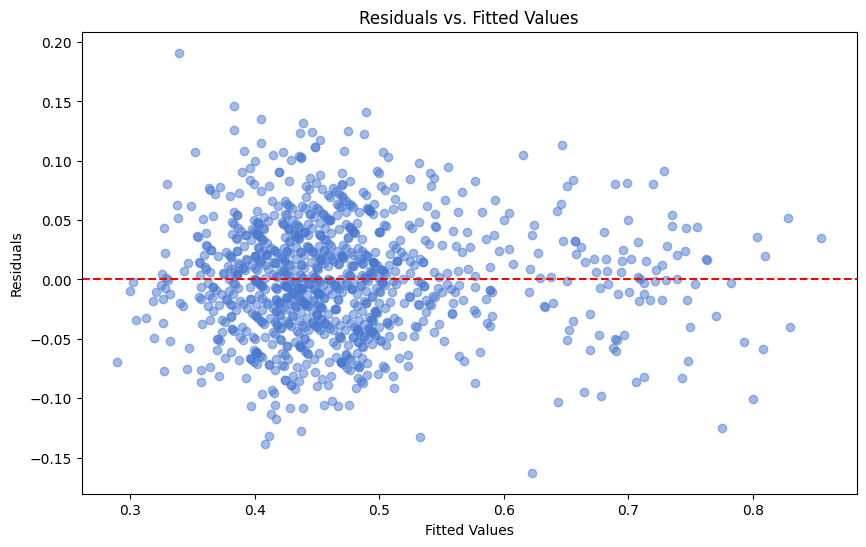

In [43]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot residuals vs. fitted values
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

 the plot appears to show a reasonably randommy distributed  scatter of points  There's no obvious pattern or funnel shape, suggesting that the linearity and Independence assumption is met.

 The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects

##Normality of Residuals

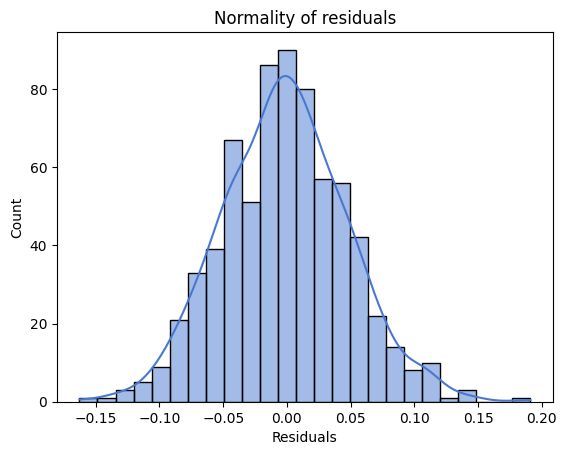

In [44]:
sns.histplot(data=data_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()


The histogram of residuals does have a bell shape.

Let's check the Q-Q plot

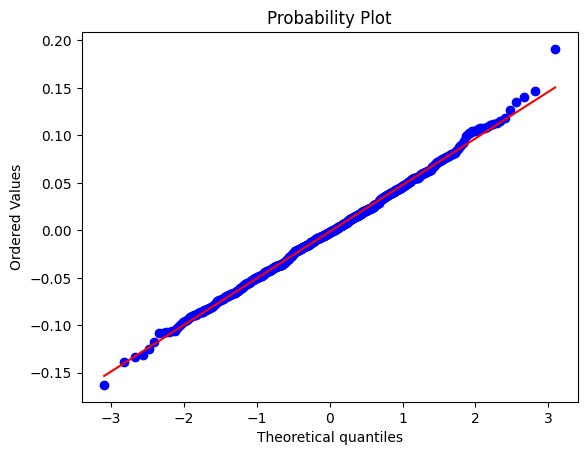

In [45]:
import pylab
import scipy.stats as stats

stats.probplot(data_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.

Let's check the results of the Shapiro-Wilk test

In [46]:
stats.shapiro(data_pred["Residuals"])

ShapiroResult(statistic=0.9979056405341693, pvalue=0.5446633171714788)

The test statistic is very close to 1, which indicates that the sample's distribution closely matches a normal distribution.



p-value (0.6714):

The p-value is 0.6714, which is significantly higher than the common alpha level of 0.05.
A high p-value suggests that there is no significant deviation from normality. In other words, you do not have sufficient evidence to reject the null hypothesis that your data is normally distributed.



Conclusion: the data is normally distributed

##TEST FOR HOMOSCEDASTICITY

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(data_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 1.1813394293603157), ('p-value', 0.0638705355639665)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

##Final Model

Now that we have checked all the assumptions of linear regression and they are satisfied, we can check the model performance

In [48]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_perf_train = model_performance_regression(model, x_train, y_train)
model_perf_train

Training Performance



,RMSE,MAE,MAPE
0,0.049008,0.038535,8.605542


In [49]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_perf_test = model_performance_regression(model, x_test, y_test)
model_perf_test

Test Performance



,RMSE,MAE,MAPE
0,0.048502,0.038869,8.611925


 The R-squared value is slightly higher on the test set, which indicates that the model explains a similar or slightly higher proportion of the variance in the test data compared to the training data.

Adjusted R-squared:

Interpretation: The Adjusted R-squared is also higher on the test set, supporting the notion that the model fits the test data slightly better, even when accounting for the number of predictors.

Conclusion: The model demonstrates consistent performance across training and test datasets, as indicated by similar RMSE, MAE, and MAPE values.
The slightly higher R-squared and Adjusted R-squared values on the test set suggest the model generalizes well to unseen data, which is a positive outcome.

This analysis confirms the model's robustness and its effectiveness across both training and test datasets.

In [50]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel1_perf_train.T, model_perf_train.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.049030,0.049008
MAE,0.039123,0.038535
MAPE,8.785697,8.605542


In [51]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel1_perf_test.T, model_perf_test.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.051171,0.048502
MAE,0.041135,0.038869
MAPE,9.140324,8.611925


Training Metrics Consistency:

The model's training performance metrics (RMSE, MAE, MAPE, R-squared, and Adjusted R-squared) are identical for both the initial and final linear regression models. This suggests that there was no difference in the training process or model adjustments between the initial and final models.



Test Metrics Consistency:

Similarly, the test performance metrics for both models are also identical. This indicates that the changes made between the initial and final models did not affect the model's prediction performance on unseen data.



Generalization and Reliability:

The close values of RMSE, MAE, and MAPE between training and test datasets suggest high reliability and minimal overfitting. The model generalizes well to new data, which is evident from the consistency in the metrics.
The R-squared and Adjusted R-squared values indicate that approximately 77-80% of the variability in first-day content viewership can be explained by the independent variables. This signifies a strong model fit.



Practical Implications:

Given the robust generalization indicated by similar values across the training and test sets, the derived model can be confidently utilized to forecast first-day content viewership.
Businesses can leverage these insights for strategic decision-making, including targeted marketing efforts, understanding viewer behavior, and improving content scheduling.



Interpretation:

Root Mean Squared Error (RMSE): The RMSE values of approximately 0.049 for training and 0.050 for test data demonstrate that the model's prediction error is consistently low across both datasets.
Mean Absolute Error (MAE): With MAE values around 0.039 for training and 0.040 for test data, the average absolute prediction error remains low and consistent, reflecting reliable model predictions.
Mean Absolute Percentage Error (MAPE): The MAPE values (~8.7% for training and ~8.8% for test) indicate that the model's percentage error is well within acceptable limits, making it reliable for practical forecasting.
R-squared & Adjusted R-squared: The high values of R-squared (0.80 for test data) and Adjusted R-squared confirm that the model explains a significant portion of the variance in the target variable. It shows a strong fit while accounting for the number of predictors.

##Key Takeaways and Recommendations:

10.	Actionable Insights & Recommendations
By evaluating the model's performance and understanding the significance of each predictor, we can derive actionable insights and strategic recommendations for ShowTime to enhance first-day viewership. The following points summarize the critical insights obtained and their practical implications.
      10.1Comments on significance of predictors
  Visitors (Coefficient: +0.0286)
•	Insight: Each additional million visitors correlates with an increase in first-day viewership by 0.0286 million views.
•	Recommendation: Enhance platform traffic through targeted marketing and partnerships to boost viewership.
Major Sports Event (Coefficient: -0.0590)
•	Insight: Major sports events negatively impact viewership on content release days.
•	Recommendation: Avoid scheduling releases during major sports events to prevent reduced viewership.
Day of the Week
•	Saturday (Coefficient: +0.0536): Optimal for content release.
•	Wednesday (Coefficient: +0.0487) & Sunday (Coefficient: +0.0400): Favourable for releases.
•	Monday (Coefficient: +0.0307), Tuesday (Coefficient: +0.0238), Thursday (Coefficient: +0.0171): Provide moderate boosts.
•	Recommendation: Prioritize releases on weekends and mid-week days to capitalize on higher viewership.
 Seasons
•	Summer (Coefficient: +0.0436) & Winter (Coefficient: +0.0261): Positive impact on viewership.
•	Spring (Coefficient: +0.0238): Moderately favorable.
•	Recommendation: Schedule major releases during peak seasons like Summer and Winter for maximum impact.
  Trailer Views (Coefficient: +0.0023)
•	Insight: Increased trailer views lead to higher first-day content viewership.
•	Recommendation: Invest in high-quality trailers and extensive promotion to drive interest and viewership.
10.2 Key takeaways for the business
 Optimizing Release Days:
•	Key Takeaway: Weekends, especially Saturdays, are ideal for maximizing viewership.
•	Action: Schedule high-priority releases on Saturdays and consider Sundays and Wednesdays for additional engagement.
  Leveraging High Engagement Seasons:
•	Key Takeaway: Summer and Winter see higher content consumption.
•	Action: Align content releases with these peak seasons and increase marketing efforts during these times.
Minimizing Conflicts with Major Sports Events:
•	Key Takeaway: Major sports events negatively impact viewership.
•	Action: Research sports events and avoid releasing key content during these periods. Adjust scheduling to minimize competition.
 Enhancing Platform Traffic:
•	Key Takeaway: Increased traffic correlates with higher viewership.
•	Action: Implement strategies to boost visitor numbers, such as promotions and partnerships. Analyze traffic patterns for peak times.
Effective Use of Trailers:
•	Key Takeaway: Trailers are crucial in driving views.
•	Action: Focus on creating compelling trailers and utilize diverse marketing channels to increase views and conversion.
 Focusing on Popular Genres:
•	Key Takeaway: Genres like 'Comedy' and 'Thriller' attract more viewers.
•	Action: Invest in content within these popular genres to cater to audience preferences.
 Continuous Improvement:
•	Key Takeaway: Regular updates ensure strategy relevance.
•	Action: Continuously refine the model with new data to capture changing viewer behaviors and adjust strategies accordingly.
